 # Etapa 1: Limpieza de Datos
 Equipo 2

---





## Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.imputation import mice
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

## Montaje de Datos en Google Drive
Se monta la unidad en Google Drive y se cargan los datos directamente de esta fuente.

In [2]:
# Montamos unidad en Google Drive y Cargamos los datos
# from google.colab import drive
# drive.mount('/content/gdrive')

# Carga de datos desde Drive
# train = pd.read_csv("/content/gdrive/MyDrive/EquipoIA/Reto/train.csv")
# test = pd.read_csv("/content/gdrive/MyDrive/EquipoIA/Reto/test.csv")

## Carga de Datos Local
En caso que sea necesario, se cargan los datos localmente desde su archivos CSV

In [3]:
# Carga de archivos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Exploración de Datos


Determinamos la extensión y las columnas que contiene el dataframe de entrenamiento que buscamos limpiar.

In [4]:
# Mostramos los primeros 5 registros de la tabla, además observamos todas las columnas que contiene
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Comparamos las dimensiones de los conjuntos de datos de entrenamiento y prueba. Esto nos permite asegurar que contamos con una proporción adecuada de datos para entrenar el modelo de manera efectiva.

In [5]:
size_test = test.shape[0]
size_train = train.shape[0]
print("Cantidad de registros en test:", size_test, "\nCantidad de registros en train:", size_train)

Cantidad de registros en test: 418 
Cantidad de registros en train: 891


Revisamos el tipo de datos de cada una de las 12 columnas del dataframe de entrenamiento para tomar decisiones sobre la posible limpieza de datos

In [6]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Observamos que contamos con algunas variables no numéricas como Name, Sex, Ticket, Cabin y Embarked. Las cuales tendremos que tratar de otra manera en caso de buscar sustituirlas.

In [7]:
# Revisamos cantidad de datos nulos con el fin de orientar neustra limpieza a aquellas variables que lo ameriten
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Observamos que contamos con valores nulos en 3 variables: Age, Cabin y Embarked. La primera siendo numérica y las otras dos textos, por lo que el tratamiento que se les dará a cada una será diferente.

## Visualización de Datos

#### Boxplot de Edad de Pasajeros



<Axes: xlabel='age'>

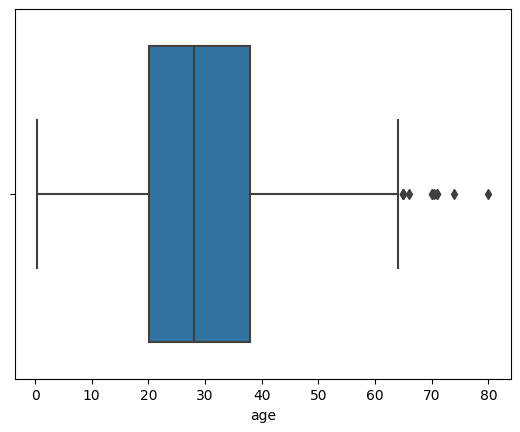

In [8]:
df = sns.load_dataset("titanic")
sns.boxplot(x=df["age"])

#### Boxplot de Edad de Pasajeros por Clase

<Axes: xlabel='age', ylabel='class'>

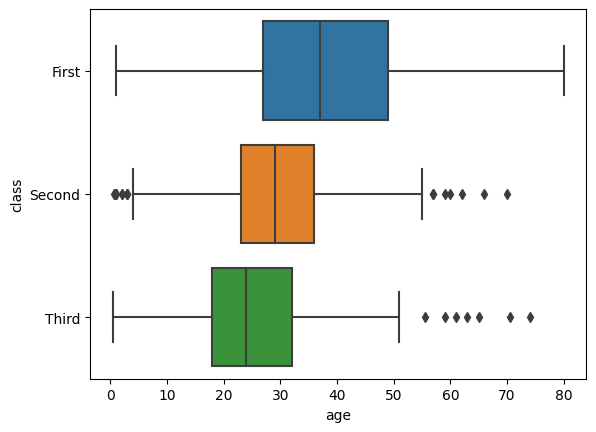

In [9]:
sns.boxplot(data=df, x="age", y="class")

#### Boxplot de Edad de Pasajeros por Sobrevivencia



<Axes: xlabel='age', ylabel='class'>

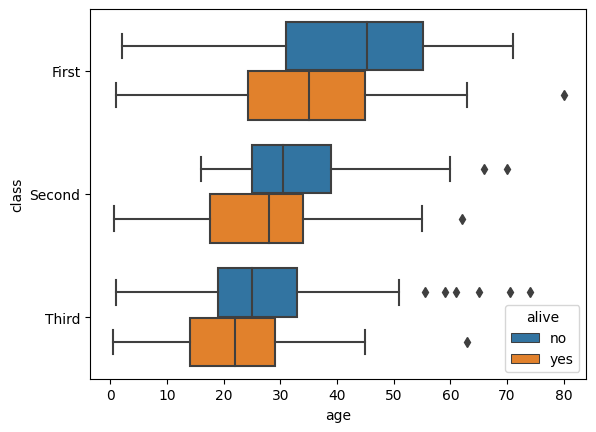

In [10]:
sns.boxplot(data=df, x="age", y="class", hue="alive")

## Limpieza de Datos

### Paso 1 : Limpieza de Columna "Age" y Feature Engineering con Titulo


 La columna 'Age' (Edad) es una característica importante para predecir la supervivencia en el Titanic. Las edades pueden influir en la probabilidad de supervivencia, ya que es posible que se haya dado prioridad a niños y ancianos durante el rescate. Además, la edad puede estar relacionada con otras características, como la clase del pasajero, que también pueden influir en la supervivencia.


In [11]:
# Contando los valores nulos en la columna 'Age' para ambos conjuntos

# Para el conjunto de entrenamiento (train)
null_values_train = train['Age'].isnull().sum()
print(f"Valores nulos en la columna 'Age' del conjunto de entrenamiento: {null_values_train}")

# Para el conjunto de prueba (test)
null_values_test = test['Age'].isnull().sum()
print(f"Valores nulos en la columna 'Age' del conjunto de prueba: {null_values_test}")

Valores nulos en la columna 'Age' del conjunto de entrenamiento: 177
Valores nulos en la columna 'Age' del conjunto de prueba: 86


Para tener una mejor idea de cómo manejar estos datos, vamos a visualizar la distribución de la variable.

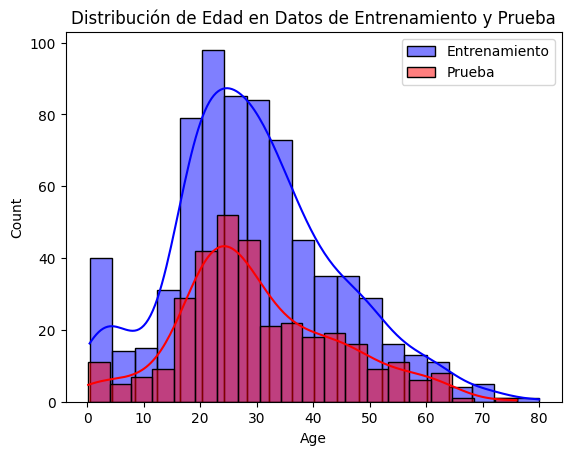

In [12]:
# Distribución de Edad en ambos conjuntos
sns.histplot(data=train, x='Age', kde=True, bins=20, color='blue', label='Entrenamiento')
sns.histplot(data=test, x='Age', kde=True, bins=20, color='red', label='Prueba')

plt.title('Distribución de Edad en Datos de Entrenamiento y Prueba')
plt.legend()
plt.show()

 Una observación interesante es que en la columna 'Name', cada nombre tiene un título asociado (como Mr., Mrs., Master., Miss., Bissette y Bishop). Estos títulos pueden proporcionarnos pistas sobre la edad de la persona. Por ejemplo:
- 'Master.' generalmente indica niños varones entre 0 a 12 años.
- 'Mrs.' se refiere a una mujer casada, lo que sugiere que es poco probable que tenga menos de 16 años (edad de consentimiento).


In [13]:
# Por ello extraemos el título de la columna 'Name'
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [14]:
# Verificamos resultados
train["Title"].head(4)

0      Mr
1     Mrs
2    Miss
3     Mrs
Name: Title, dtype: object

#### Random Forest: Método de Imputación de Edad

La elección de utilizar Random Forest para la imputación de datos se basa en:

1. **Capacidad de Manejar Datos No Lineales**: Random Forest, al ser un ensamble de árboles de decisión, puede capturar relaciones no lineales y complejas entre las características. Esto lo hace adecuado para imputar valores basándose en múltiples características de entrada.

2. **Menor Riesgo de Sobreajuste**: Aunque los árboles de decisión individuales pueden ser propensos al sobreajuste, el ensamblado en Random Forest ayuda a promediar las predicciones de múltiples árboles, lo que reduce la varianza y el riesgo de sobreajuste.

3. **Imputación Basada en Múltiples Características**: A diferencia de las técnicas de imputación univariante, que rellenan valores faltantes basándose en una sola característica, Random Forest utiliza múltiples características para hacer una predicción, lo que puede resultar en imputaciones más precisas.


#### Imputación de Train con RF

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Suponiendo que ya has cargado tus datos en las variables 'train' y 'test'
# y que ya has extraído la columna 'Title' de 'Name'

# Convertir las variables categóricas en dummies
train_dummies = pd.get_dummies(train, columns=['Title', 'Sex', 'Pclass', 'Embarked'], drop_first=True)
test_dummies = pd.get_dummies(test, columns=['Title', 'Sex', 'Pclass', 'Embarked'], drop_first=True)

# Eliminar columnas que no se utilizarán para el entrenamiento
train_dummies = train_dummies.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_dummies = test_dummies.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Alinear los conjuntos 'train_dummies' y 'test_dummies' para asegurarse de que tengan las mismas columnas
train_dummies, test_dummies = train_dummies.align(test_dummies, join='outer', axis=1, fill_value=0)

# Dividir el conjunto 'train' en registros con 'Age' y registros sin 'Age'
train_with_age = train_dummies.dropna(subset=['Age'])
train_without_age = train_dummies[train_dummies['Age'].isnull()].copy()

# Definir características y objetivo para 'train'
X_train = train_with_age.drop('Age', axis=1)
y_train = train_with_age['Age']

# Entrenar el Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir los valores faltantes de 'Age' en 'train'
predicted_ages_train = rf.predict(train_without_age.drop('Age', axis=1))
train_without_age.loc[:, 'Age'] = predicted_ages_train

# Asignar las edades predichas al DataFrame 'train' original
train.loc[train['Age'].isnull(), 'Age'] = predicted_ages_train

# Dividir el conjunto 'test' en registros con 'Age' y registros sin 'Age'
test_with_age = test_dummies.dropna(subset=['Age'])
test_without_age = test_dummies[test_dummies['Age'].isnull()].copy()

# Predecir los valores faltantes de 'Age' en 'test'
predicted_ages_test = rf.predict(test_without_age.drop('Age', axis=1))
test_without_age.loc[:, 'Age'] = predicted_ages_test

# Asignar las edades predichas al DataFrame 'test' original
test.loc[test['Age'].isnull(), 'Age'] = predicted_ages_test

In [16]:
# Para el conjunto de entrenamiento (train)
null_values_train = train['Age'].isnull().sum()
print(f"Valores nulos en la columna 'Age' del conjunto de entrenamiento: {null_values_train}")

# Para el conjunto de prueba (test)
null_values_test = test['Age'].isnull().sum()
print(f"Valores nulos en la columna 'Age' del conjunto de prueba: {null_values_test}")

Valores nulos en la columna 'Age' del conjunto de entrenamiento: 0
Valores nulos en la columna 'Age' del conjunto de prueba: 0


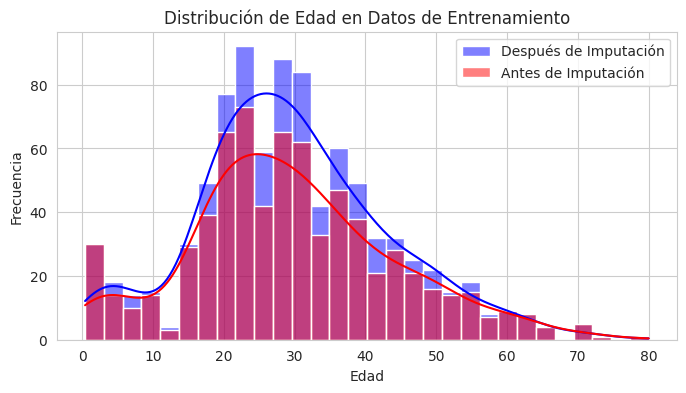

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial
sns.set_style("whitegrid")

# Histograma para el conjunto 'train'
plt.figure(figsize=(8, 4))
sns.histplot(train['Age'], kde=True, bins=30, label='Después de Imputación', color='blue', alpha=0.5)
sns.histplot(train_dummies['Age'], kde=True, bins=30, label='Antes de Imputación', color='red', alpha=0.5)
plt.title('Distribución de Edad en Datos de Entrenamiento')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



### Paso 2 : Limpieza de Columna "Embarked"


La variable Embarked tiene solo 3 registros faltantes, lo cual simplica el proceso de imputación. Generalmente cuando son pocos datos, lo que suele hacerse es sustituirlo por el valor más frecuente. Sobre todo si consideramos que es un dato cualitativo, es por ello que procederemos de esta manera. Utilizar el valor más común es una técnica estándar de imputación para variables categóricas, ya que introduce un cambio mínimo en la distribución de los datos y es menos probable que introduzca ruido o distorsiones.

In [18]:
# Primero veamos la frecuencia y categorias de la variable
print(train['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [19]:
# Vemos que una de ellas domina, por lo que la rellenaremos con ella

most_common_embarked = train['Embarked'].mode()[0]

train['Embarked'].fillna(most_common_embarked, inplace=True)

In [20]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [21]:
# Revisamos cantidad de datos nulos con el fin de orientar neustra limpieza a aquellas variables que lo ameriten
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

### Paso 3: Imputación de Columna "Cabin"

La columna Cabin en el conjunto de datos es  desafiante debido a la gran cantidad de valores faltantes. Sin embargo, hay varias estrategias que podemos considerar para abordar este problema.

Antes de decidir cómo manejar los valores faltantes en la columna Cabin, es esencial entender su importancia en el conjunto de datos. Podemos calcular la correlación entre una versión codificada de Cabin y la variable objetivo Survived. Si hay una correlación significativa, indica que Cabin tiene información relevante.

In [24]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del LabelEncoder
le = LabelEncoder()

# Codificar la columna 'Cabin'
train['Cabin_encoded'] = le.fit_transform(train['Cabin'].astype(str))

# Calcular la correlación con 'Survived'
correlation = train['Survived'].corr(train['Cabin_encoded'])
print(f"Correlación entre 'Survived' y 'Cabin_encoded': {correlation:.2f}")

Correlación entre 'Survived' y 'Cabin_encoded': -0.25


Es una correlación negativa moderada. Es posible que las cabinas ubicadas en ciertas partes del barco fueran menos accesibles a los botes salvavidas o estuvieran más expuestas a peligros durante el hundimiento. Esta correlación proporciona evidencia de que la columna Cabin contiene información relevante para predecir la supervivencia y justifica su retención e imputación en el conjunto de datos.

#### Extracción de la Cubierta:

La idea detrás de esto es que la primera letra de la cabina indica la cubierta en la que se encontraba el pasajero.
Por ejemplo, si la cabina es C85, la cubierta es C.
Así que, decidimos extraer esta letra y guardarla en una nueva columna llamada Deck. Los faltantes serán colocado con Unknown, ya que pueden indicar que pertenecen a una clase determinada.

In [25]:
# Extraer la primera letra de la columna 'Cabin' para obtener la cubierta
train['Deck'] = train['Cabin'].str[0]
test['Deck'] = test['Cabin'].str[0]

# Agrupar por número de ticket y llenar las cabinas faltantes con el modo (valor más común) dentro de ese grupo
train['Deck'] = train.groupby('Ticket')['Deck'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
test['Deck'] = test.groupby('Ticket')['Deck'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

# Para las cabinas que aún falten, imputarlas con 'Unknown'
train['Deck'].fillna('Unknown', inplace=True)
test['Deck'].fillna('Unknown', inplace=True)

In [26]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [27]:
# Revisamos cantidad de datos nulos con el fin de verificar que finalizamos nuestra limpieza.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
Cabin_encoded    0
Deck             0
dtype: int64

### Paso 4: Undersampling

El Undersampling consiste en cortar los datos para balancear la base de entrenamiento y que el modelo conozca de manera equitativa las dos clases (la variables de defunción y sobrevivientes)


In [28]:
from sklearn.utils import resample

In [29]:
# Separar sobrevivientes de muertos
non_survivors = train[train['Survived']==0] # Muertos
survivors = train[train['Survived']==1] # Sobrevivientes

In [30]:
# Llamar la función de undersampling
under_dead = resample(non_survivors,
                      replace = False, #False = Undersample - True = Oversampling
                      n_samples = len(survivors), # Buscamos que se equipare con los registros de los sobrevivientes
                      random_state = 42) # Una constante para que cada vez que se corra el código se mantenga consistente el nuevo df

In [31]:
undersampled_df = pd.concat([under_dead,survivors]) # Juntar el nuevo df que ya está undersampled, con los existentes registros de sobrevivientes

In [32]:
undersampled_df = undersampled_df.sample(frac=1,random_state=42) # Mezcla el orden de los registros de los dos df

In [33]:
undersampled_df.shape # Revisamos el tamaño del nuevo df

(684, 14)

In [34]:
nuevo_df = undersampled_df # Renombramos el df

In [36]:
nuevo_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'Cabin_encoded',
       'Deck'],
      dtype='object')

### Paso 5: Exportar de Datos Limpios

In [37]:
nuevo_df.to_csv("Clean_Data_Train.csv", index=False)

## Limpia de datos: Visualización
Boxplot de edad. Distribución de Tarifa y Edad

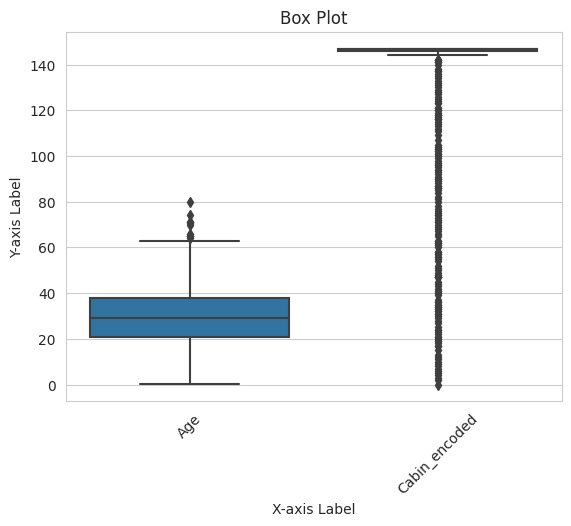

In [38]:
#Boxplot de edad

sns.boxplot(data=nuevo_df.drop(['Survived','PassengerId','Fare','Pclass','SibSp','Parch'], axis=1))

# Set plot title and labels
plt.title("Box Plot")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.xticks(rotation=45)

# Show the plot
plt.show()